# Predicting Productivity of Garment Employees - Machine Learning Project

## Problem Statement

This project uses the UCI "Productivity Prediction of Garment Employees" dataset to predict the actual productivity of sewing operators using available operational data.

The goal is to build accurate models to support better planning, avoid over-time work, and improve worker efficiency.


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style()  # You can change this to "darkgrid", "white", "dark", or "ticks")

In [114]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [116]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [117]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


##### Handling data Inconsistancy 

In [118]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

There are some typos and have to fix them

In [119]:
df['department']= df['department'].replace({'sweing':'sewing', 'finishing ': 'finishing'})
df['department'].value_counts()


department
sewing       691
finishing    506
Name: count, dtype: int64

##### Handling missing values

In [120]:
#filter wip value is null
df_wip_null = df[df['wip'].isnull()]
df_wip_null

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [121]:
df_wip_null['department'].value_counts()

department
finishing    506
Name: count, dtype: int64

Since all the null values in wip are into finishing department. So lets fill them as 0.

In [122]:
df.fillna({'wip': 0}, inplace=True)

##### Handling data inconsistancy

In [123]:
df['date']= pd.to_datetime(df['date'],format='%m/%d/%Y')
df['month']= df['date'].dt.month
df['year']= df['date'].dt.year


In [124]:
#check the data set after handling missing values and data inconsistancy
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015
5,2015-01-01,Quarter1,sewing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,2015
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,1,2015
7,2015-01-01,Quarter1,sewing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,1,2015
8,2015-01-01,Quarter1,sewing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,1,2015
9,2015-01-01,Quarter1,sewing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,1,2015


In [125]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
year                     0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

#### Exploratory Data Analysis

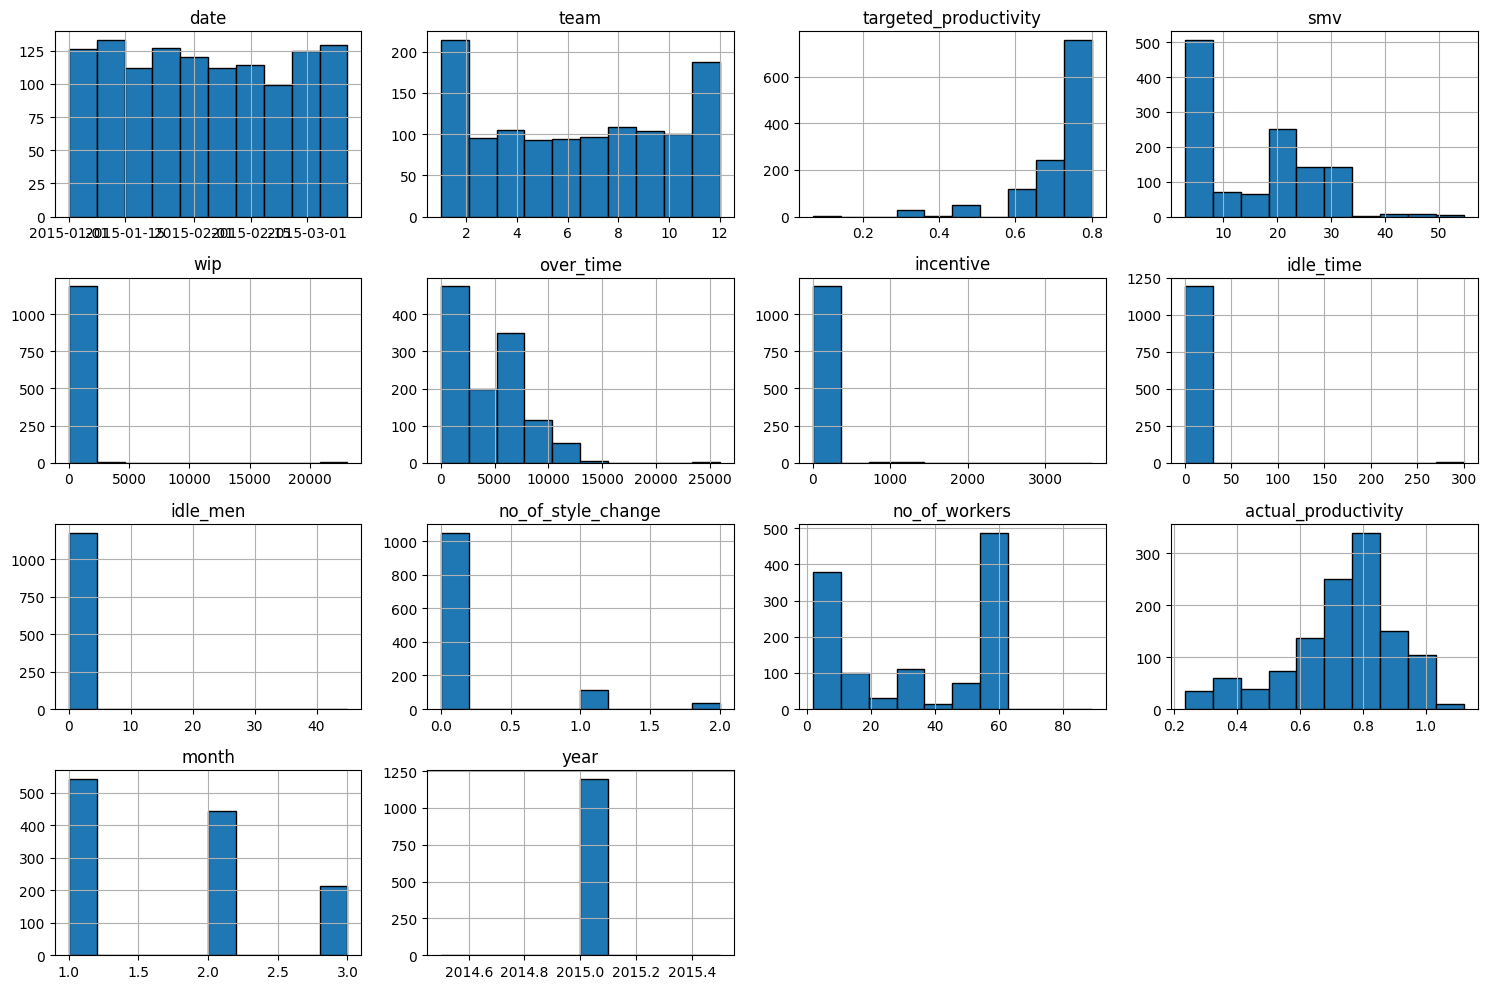

In [127]:
#plot histogram for all columns
df.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

In [128]:
# summary statistics for numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1197,2015-02-04 10:56:50.526315776,2015-01-01 00:00:00,2015-01-18 00:00:00,2015-02-03 00:00:00,2015-02-23 00:00:00,2015-03-11 00:00:00,NaN
team,1197.0,6.426901,1.0,3.0,6.0,9.0,12.0,3.463963
targeted_productivity,1197.0,0.729632,0.07,0.7,0.75,0.8,0.8,0.097891
smv,1197.0,15.062172,2.9,3.94,15.26,24.26,54.56,10.943219
wip,1197.0,687.22807,0.0,0.0,586.0,1083.0,23122.0,1514.582341
over_time,1197.0,4567.460317,0.0,1440.0,3960.0,6960.0,25920.0,3348.823563
incentive,1197.0,38.210526,0.0,0.0,0.0,50.0,3600.0,160.182643
idle_time,1197.0,0.730159,0.0,0.0,0.0,0.0,300.0,12.709757
idle_men,1197.0,0.369256,0.0,0.0,0.0,0.0,45.0,3.268987
no_of_style_change,1197.0,0.150376,0.0,0.0,0.0,0.0,2.0,0.427848


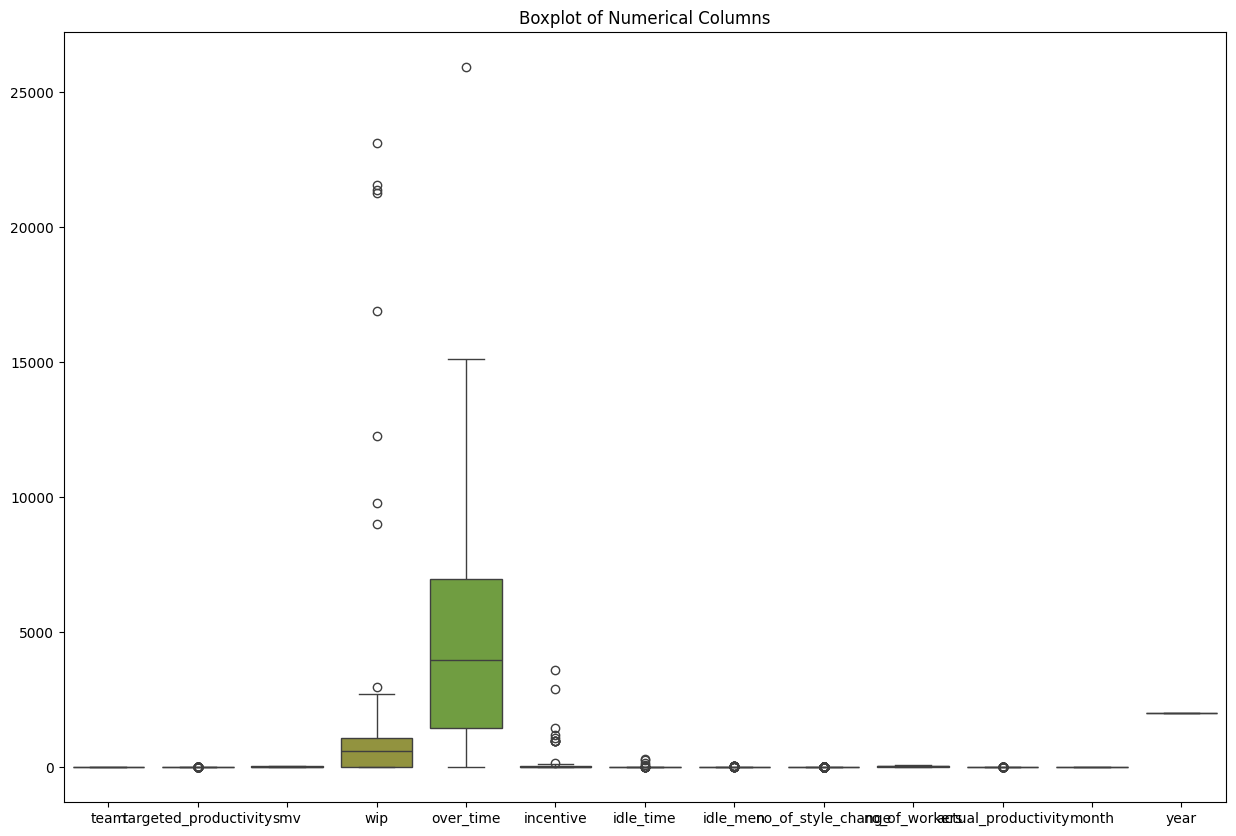

In [129]:
#plot boxplot for all numerical columns to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='v')
plt.title('Boxplot of Numerical Columns')
plt.show()


There are outliers in wip, over_time, incentive and idle_time.\
over_time => Were there real shifts with 15,000+ minutes of OT? Or is it an error?\
wip => High WIP could mean unfinished work — should be included maybe\
incentive and idle_time => Are extreme values realistic? Or data entry problems?

In [130]:
df[['over_time', 'wip', 'incentive', 'idle_time', 'actual_productivity']].describe(percentiles=[.01, .25, .5, .75, .99])

,over_time,wip,incentive,idle_time,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,4567.460317,687.228070,38.210526,0.730159,0.735091
std,3348.823563,1514.582341,160.182643,12.709757,0.174488
min,0.000000,0.000000,0.000000,0.000000,0.233705
1%,0.000000,0.000000,0.000000,0.000000,0.263593
25%,1440.000000,0.000000,0.000000,0.000000,0.650307
50%,3960.000000,586.000000,0.000000,0.000000,0.773333
75%,6960.000000,1083.000000,50.000000,0.000000,0.850253
99%,10620.000000,1880.280000,119.000000,4.000000,1.005156
max,25920.000000,23122.000000,3600.000000,300.000000,1.120437


In [131]:
#remove outliers beyond 99th percentile
df_cleaned = df.copy()
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    upper_limit = df_cleaned[col].quantile(0.99)
    df_cleaned = df_cleaned[df_cleaned[col] <= upper_limit]

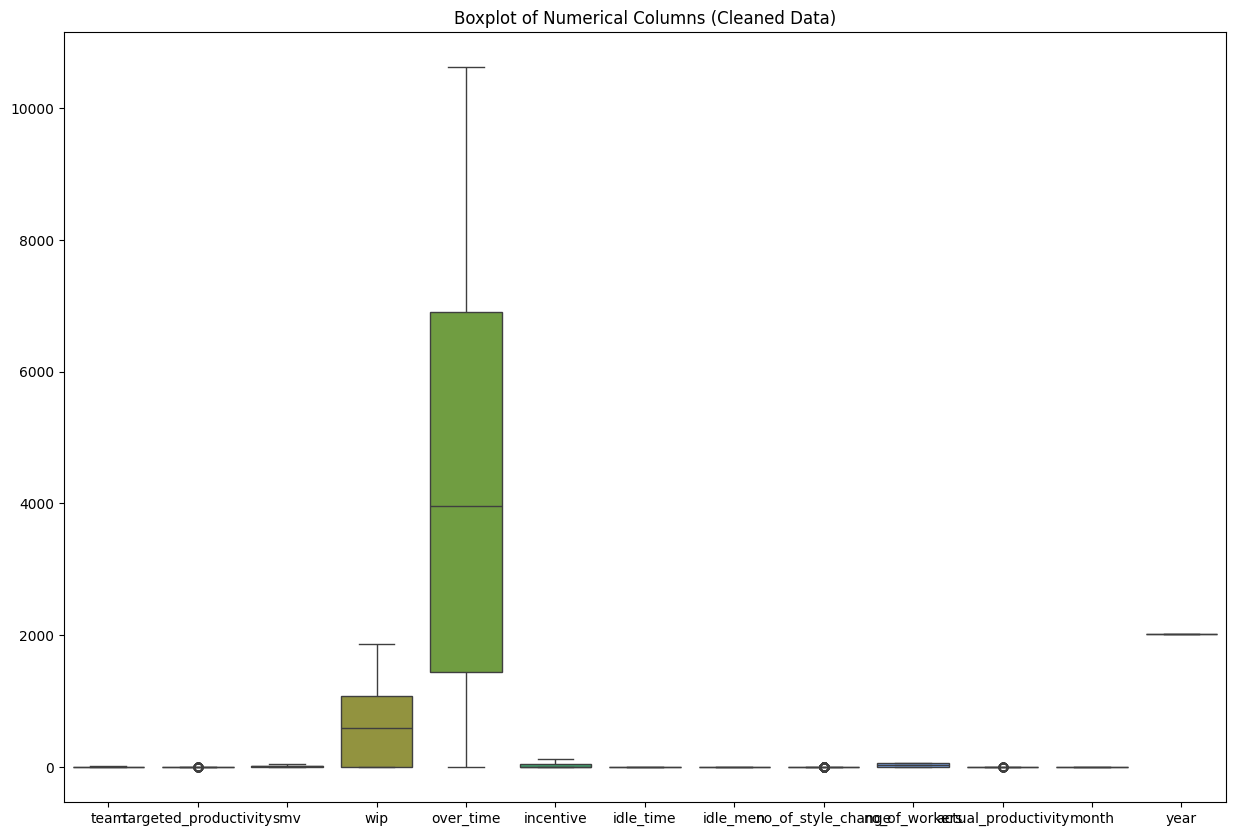

In [132]:
# plot the box plot chart for cleaned data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned.select_dtypes(include=[np.number]), orient='v')
plt.title('Boxplot of Numerical Columns (Cleaned Data)')
plt.show()

#### Further data analysis with cleaned data

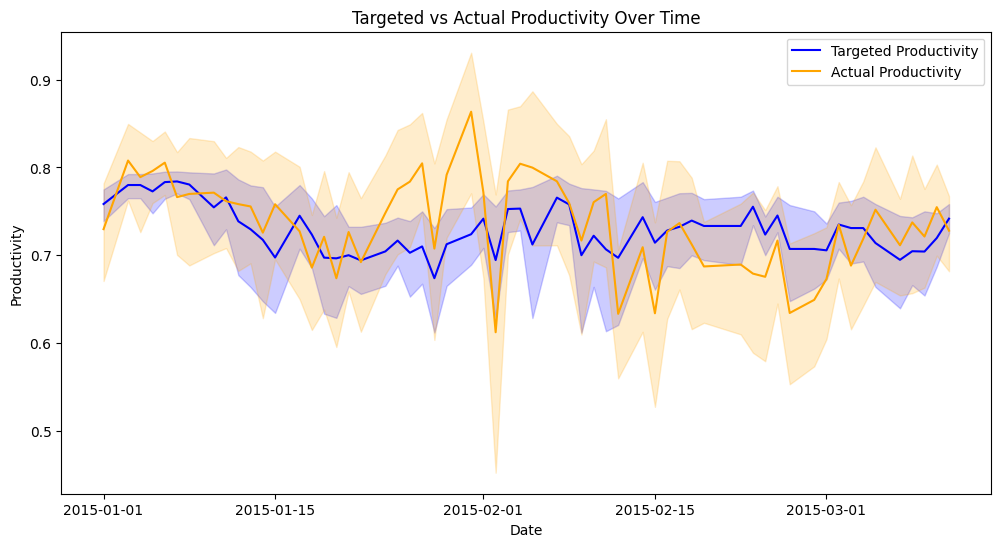

In [133]:
# compared to the targeted productivity to actual productivity
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='targeted_productivity', label='Targeted Productivity', color='blue')
sns.lineplot(data=df_cleaned, x='date', y='actual_productivity', label='Actual Productivity', color='orange')   
plt.title('Targeted vs Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.show()

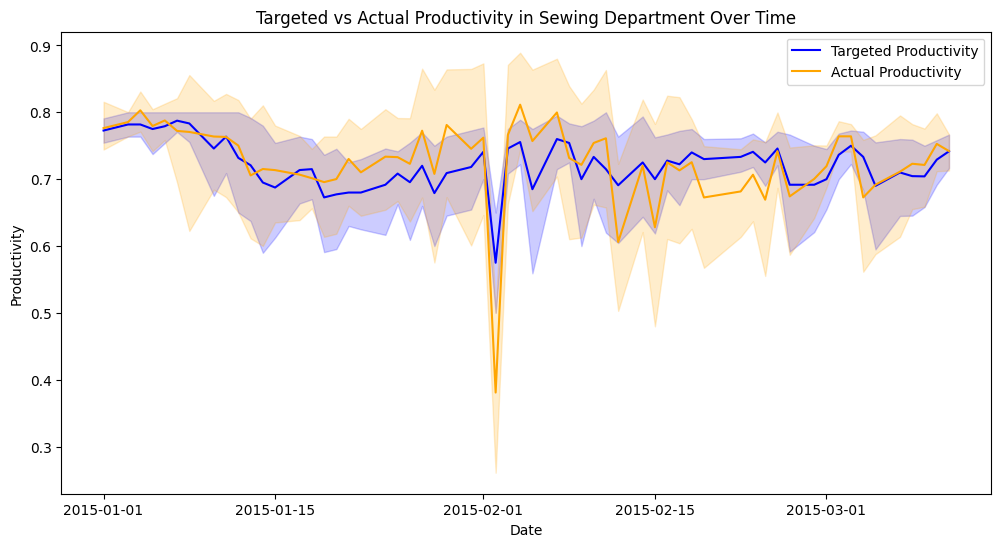

In [134]:
#compared targeted productivity to actual productivity by department
sewing_dept = df_cleaned[df_cleaned['department'] == 'sewing']

plt.figure(figsize=(12, 6))
sns.lineplot(data=sewing_dept, x='date', y='targeted_productivity', label='Targeted Productivity', color='blue')    
sns.lineplot(data=sewing_dept, x='date', y='actual_productivity', label='Actual Productivity', color='orange')
plt.title('Targeted vs Actual Productivity in Sewing Department Over Time') 
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()


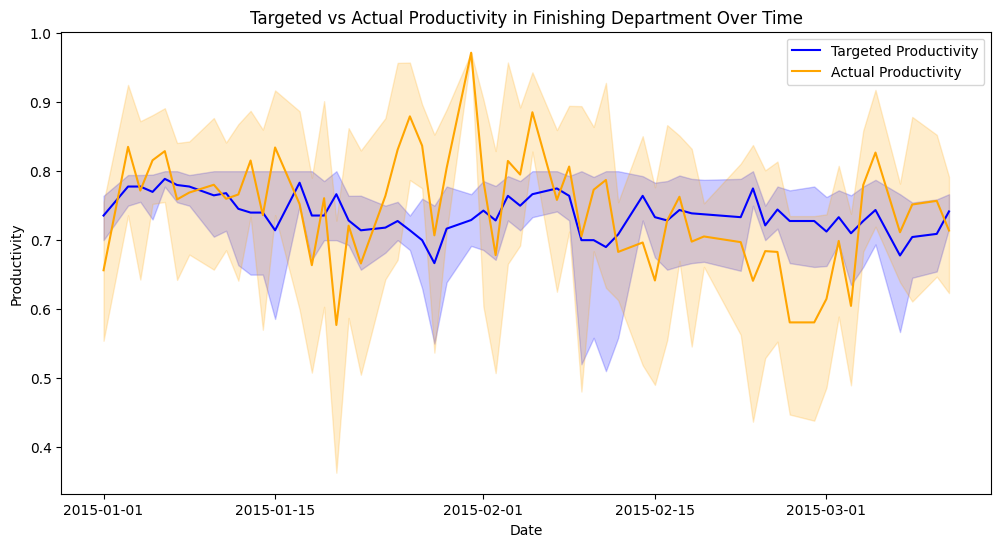

In [135]:
finishing_dept = df_cleaned[df_cleaned['department'] == 'finishing']
plt.figure(figsize=(12, 6))
sns.lineplot(data=finishing_dept, x='date', y='targeted_productivity', label='Targeted Productivity', color='blue')
sns.lineplot(data=finishing_dept, x='date', y='actual_productivity', label='Actual Productivity', color='orange')
plt.title('Targeted vs Actual Productivity in Finishing Department Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()


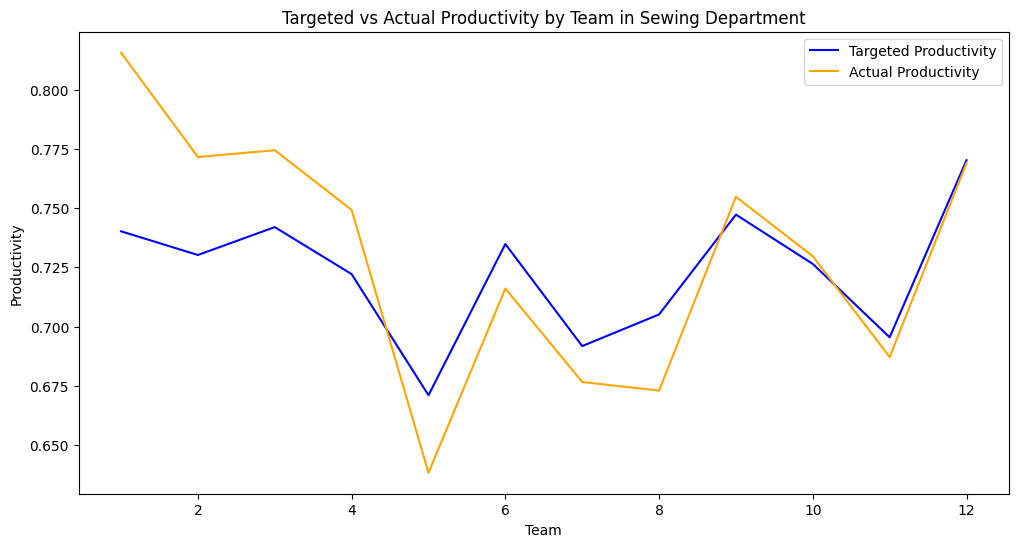

In [136]:
#compare the productivity over teams 
# sewing department

agg_sew = sewing_dept.groupby('team').agg({
    'targeted_productivity': 'mean',
    'actual_productivity': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_sew, x='team', y='targeted_productivity', color='blue', label='Targeted Productivity')     
sns.lineplot(data=agg_sew, x='team', y='actual_productivity', color='orange', label='Actual Productivity')
plt.title('Targeted vs Actual Productivity by Team in Sewing Department')
plt.xlabel('Team')
plt.ylabel('Productivity')
plt.show()


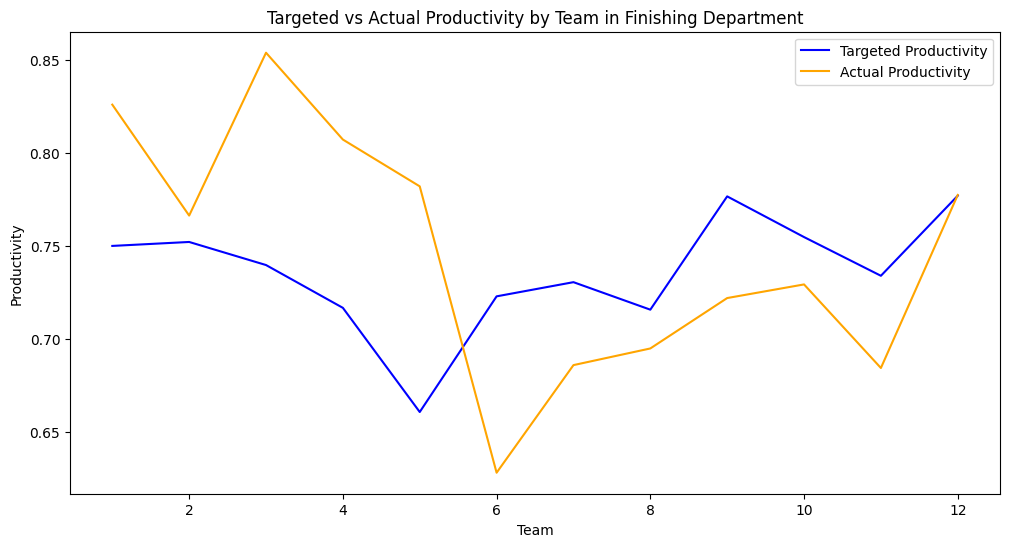

In [137]:
# finishing department

agg_fin = finishing_dept.groupby('team').agg({
    'targeted_productivity': 'mean',
    'actual_productivity': 'mean'
}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_fin, x='team', y='targeted_productivity', color='blue', label='Targeted Productivity')
sns.lineplot(data=agg_fin, x='team', y='actual_productivity', color='orange', label='Actual Productivity')
plt.title('Targeted vs Actual Productivity by Team in Finishing Department')
plt.xlabel('Team')
plt.ylabel('Productivity')
plt.show()

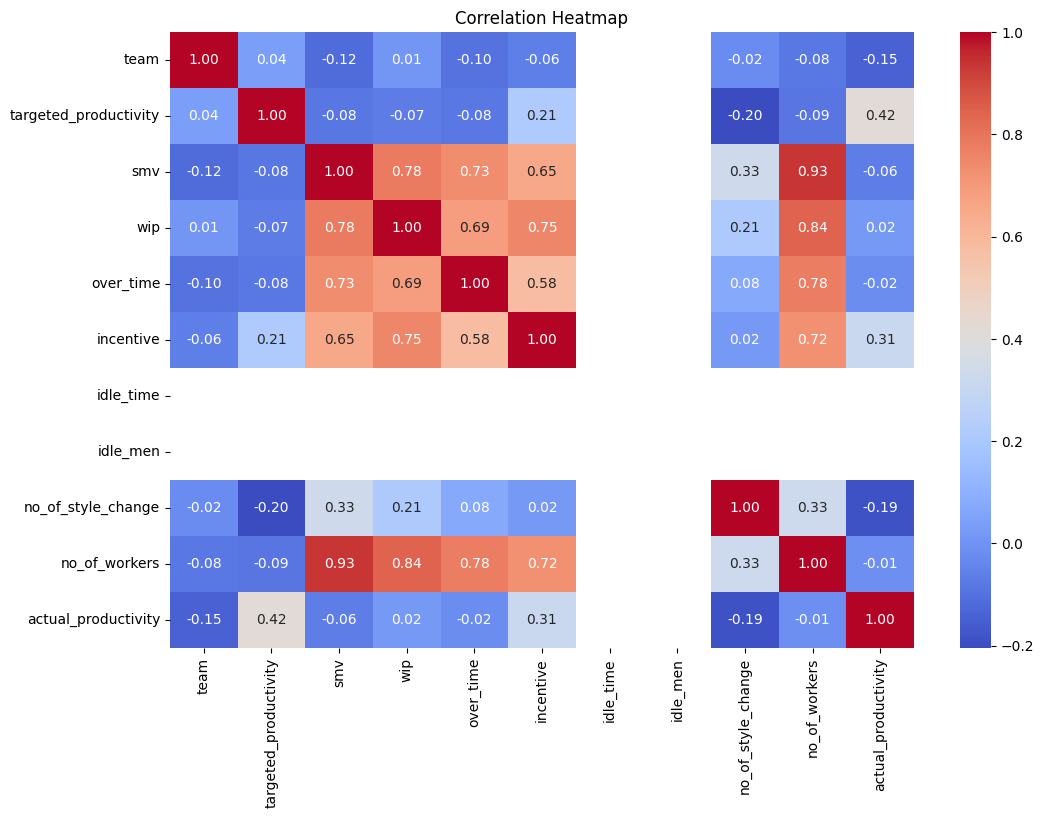

In [138]:
# Let's look at correlation between variable and productivity
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

smv, wip, over_time, no_of_workers are highly correlated (0.65–0.93).

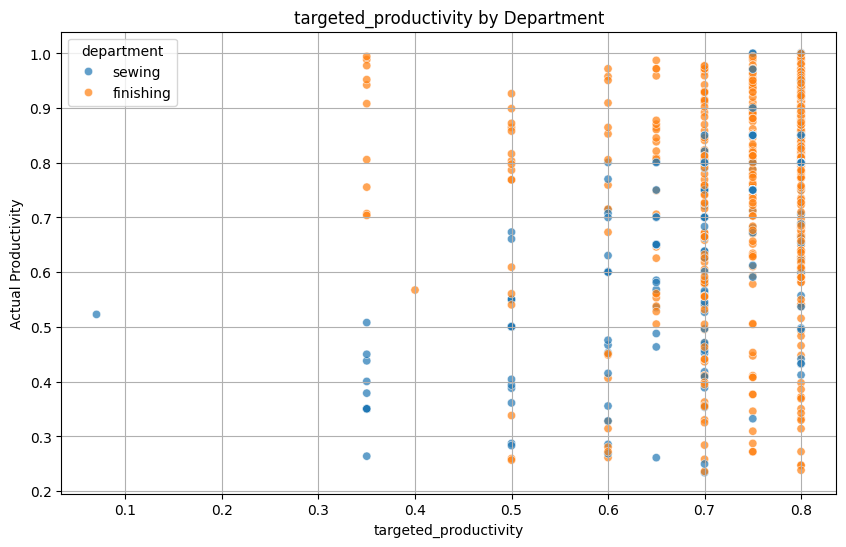

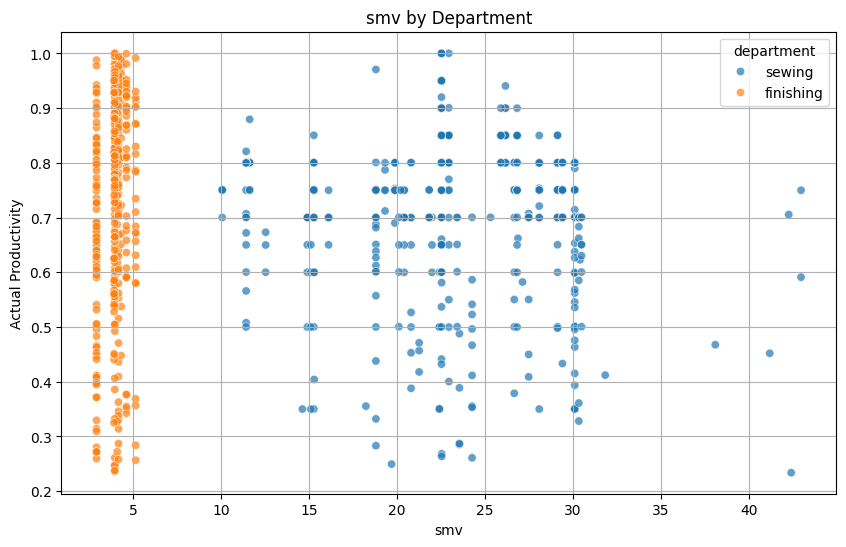

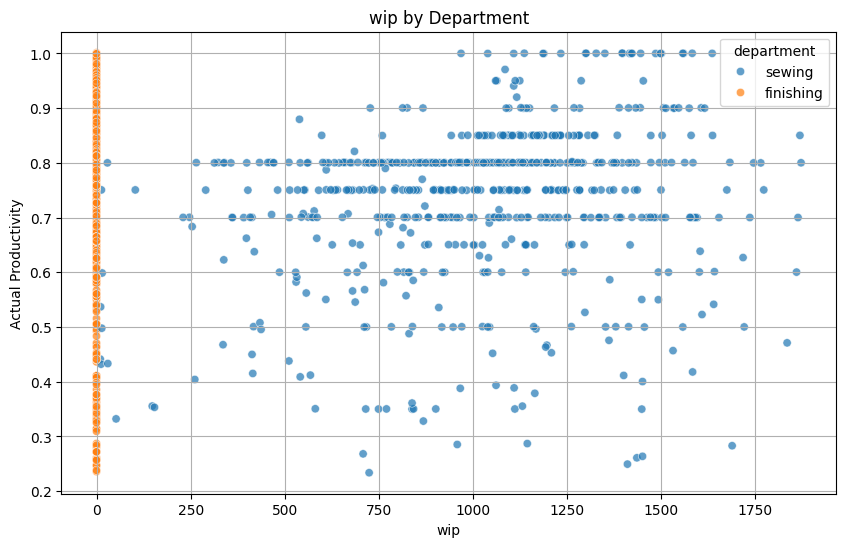

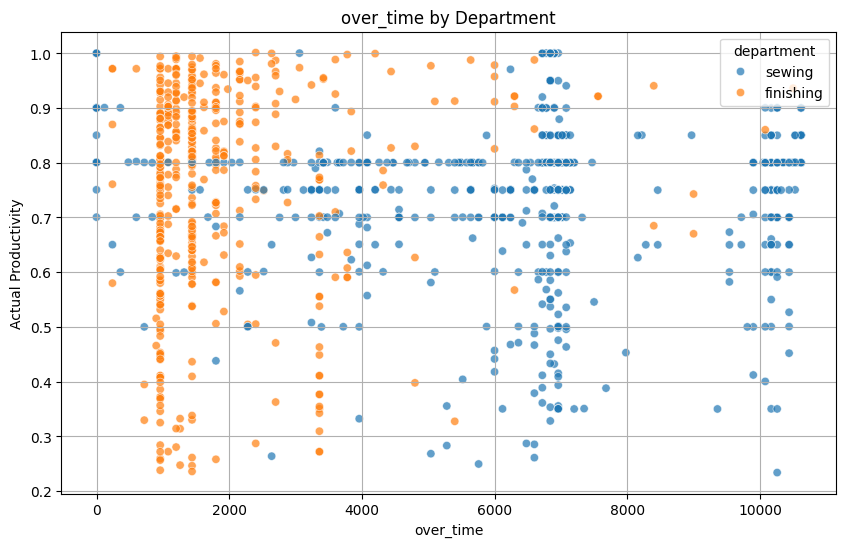

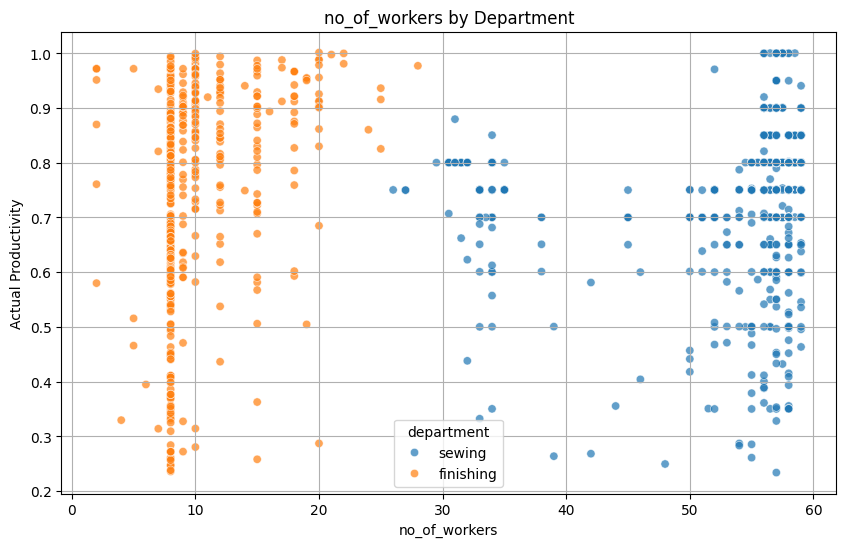

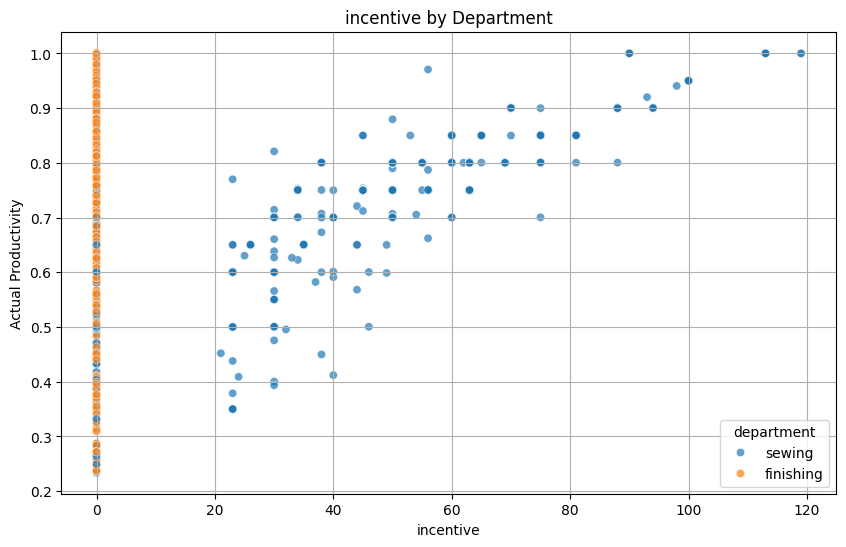

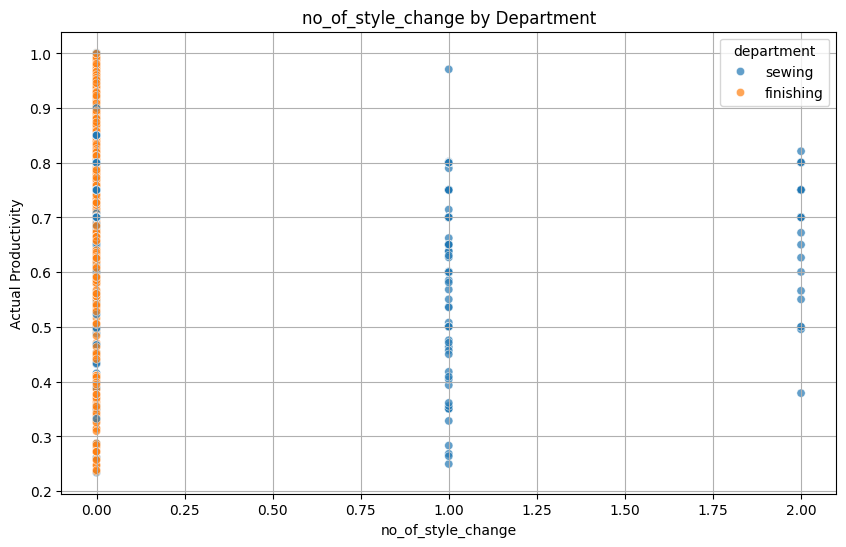

In [139]:
top_features = ['targeted_productivity', 'smv', 'wip', 'over_time', 'no_of_workers', 'incentive', 'no_of_style_change']

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=feature, y='actual_productivity',hue= 'department',alpha=0.7)
    plt.title(f'{feature} by Department')
    plt.xlabel(feature)
    plt.ylabel('Actual Productivity')
    plt.grid()
    plt.show()


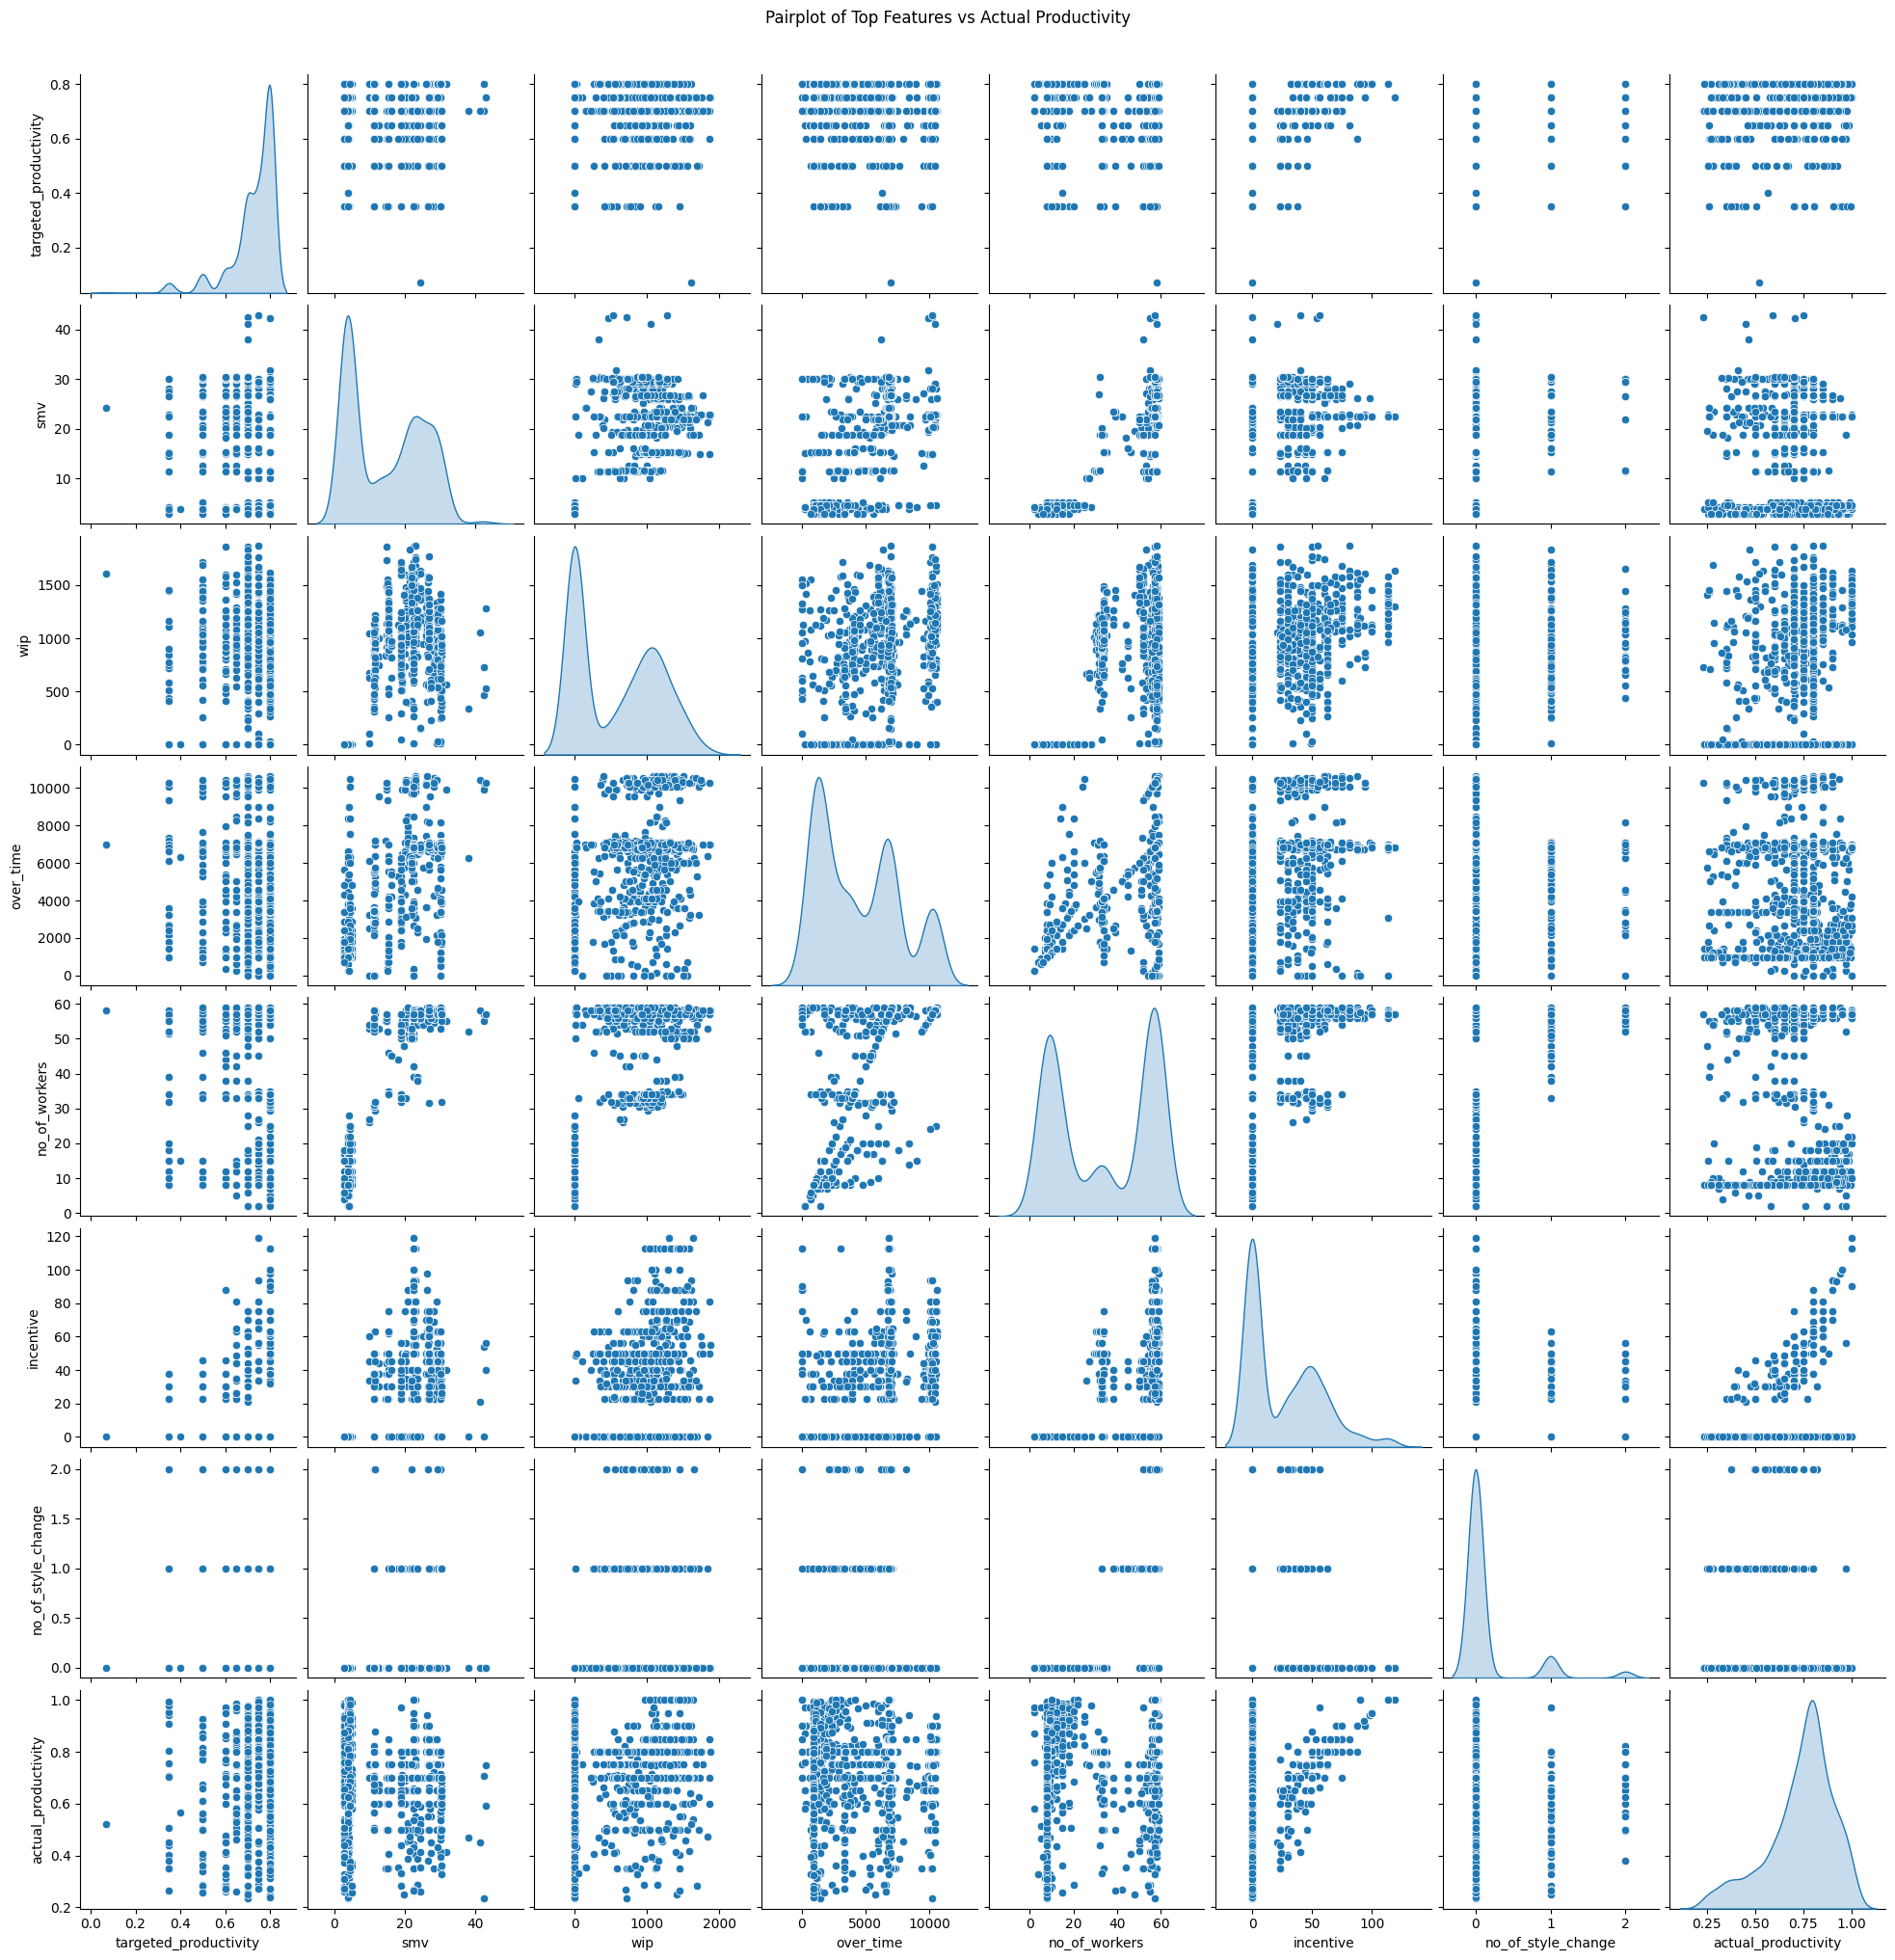

In [140]:
top_features_df = df_cleaned[top_features + ['actual_productivity']]
sns.pairplot(top_features_df, diag_kind='kde')
plt.suptitle("Pairplot of Top Features vs Actual Productivity", y=1.02)
plt.show()

Observations from the Pairplot
1. targeted_productivity vs actual_productivity
Slight positive trend: workers may achieve better when given higher targets — but not linearly.

There are many fixed values in targeted_productivity (like 0.75), making the plot look "striped".

2. smv, wip, over_time
These three have wide distributions with clear clusters, possibly indicating different product lines or departments.

No strong linear relationship with actual_productivity.

However:

Higher smv doesn't guarantee higher or lower productivity.

wip and over_time show high variance — suggesting inefficiencies or overload when too high.

3. no_of_workers
Appears to have a non-linear effect: too few or too many workers might reduce productivity.

Possibly an inverted U-shape pattern — worth exploring further.

4. incentive
Has a wide range, but many values are 0.

Doesn't show a strong clear trend with actual_productivity, but potential clusters where incentive is used.

5. no_of_style_change
Low values dominate (many are 0 or 1).

As style changes increase, productivity might drop — but hard to tell from this view. Could do better with a boxplot grouped by this feature.

#### Data Modeling

In [141]:
# One - Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df_cleaned, columns=['department', 'day'], drop_first=True)

In [142]:
# Drop Columns 
df_encoded.drop(columns=['idle_time','idle_men','date'],inplace=True)

In [143]:
# Remove quarter string from quarter 
df_encoded['quarter'] = df_encoded['quarter'].str.extract('(\d)').astype(int)

In [144]:
# Data Modeling with Regression
df_encoded.head(10)

,quarter,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,month,year,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725,1,2015,True,False,False,True,False,False
1,1,1,0.75,3.94,0.0,960,0,0,8.0,0.886500,1,2015,False,False,False,True,False,False
2,1,11,0.80,11.41,968.0,3660,50,0,30.5,0.800570,1,2015,True,False,False,True,False,False
3,1,12,0.80,11.41,968.0,3660,50,0,30.5,0.800570,1,2015,True,False,False,True,False,False
4,1,6,0.80,25.90,1170.0,1920,50,0,56.0,0.800382,1,2015,True,False,False,True,False,False
5,1,7,0.80,25.90,984.0,6720,38,0,56.0,0.800125,1,2015,True,False,False,True,False,False
6,1,2,0.75,3.94,0.0,960,0,0,8.0,0.755167,1,2015,False,False,False,True,False,False
7,1,3,0.75,28.08,795.0,6900,45,0,57.5,0.753683,1,2015,True,False,False,True,False,False
8,1,2,0.75,19.87,733.0,6000,34,0,55.0,0.753098,1,2015,True,False,False,True,False,False
9,1,1,0.75,28.08,681.0,6900,45,0,57.5,0.750428,1,2015,True,False,False,True,False,False


In [145]:
# Define features and target variable
x =df_encoded.drop(columns=['actual_productivity', 'targeted_productivity'])
y = df_encoded['actual_productivity']

In [146]:
# Split train and test data
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state= 42)

In [147]:
df_encoded.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1113, 18), (890, 16), (223, 16), (890,), (223,))

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [149]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [150]:
y_pred = model.predict(x_test_scaled)

In [151]:
from sklearn.metrics import r2_score, mean_squared_error
print("Linear Regression R^2: ", r2_score(y_test, y_pred))
print('Liner RMSE:', mean_squared_error(y_test,y_pred))


Linear Regression R^2:  0.3074482656788714
Liner RMSE: 0.017297902917127787


In [152]:
# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree =2
poly_model = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly_model.fit(x_train_scaled,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [153]:
y_pred_poly =  poly_model.predict(x_test_scaled)

In [154]:
print("Polynomial Regression R^2: ", r2_score(y_test, y_pred_poly))
print('Polynomial RMSE:', mean_squared_error(y_test,y_pred_poly))


Polynomial Regression R^2:  0.2847884743275334
Polynomial RMSE: 0.017863877777189383


Polynomial Regression performs slightly better, with a higher R² and lower RMSE.

But still: R² below 0.4 means both models explain less than 40% of the variance in productivity.

So while you’ve improved, there's definitely room for enhancement.

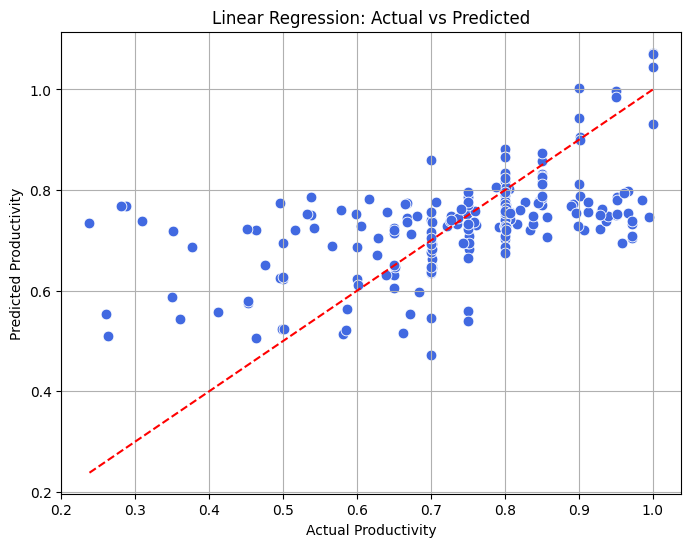

In [155]:
# Predicted VS Actual  - Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

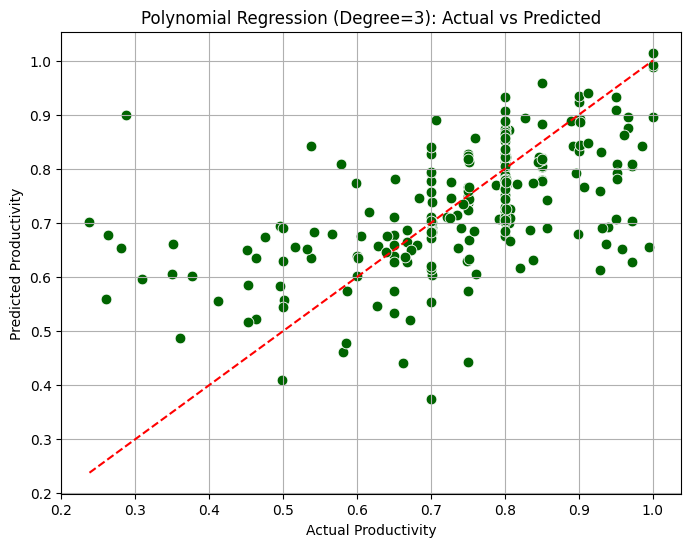

In [156]:
# Predicted VS Actual  - Polynomial Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='darkgreen', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Polynomial Regression (Degree=3): Actual vs Predicted')
plt.grid(True)
plt.show()

In [157]:
# Random Forest Regrssion Model
from sklearn.ensemble import   RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train) # no need to scale data in rf

RandomForestRegressor(random_state=42)

In [158]:
y_pred_rf = rf.predict(x_test)

In [159]:
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: 0.3832405243197208
Random Forest RMSE: 0.015404835487119253


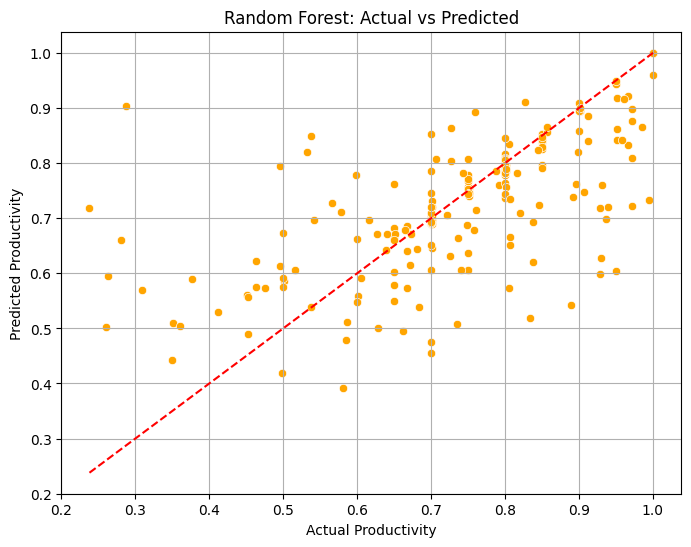

In [160]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

C:\Users\Singer\AppData\Local\Temp\ipykernel_12144\1358300716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='crest')


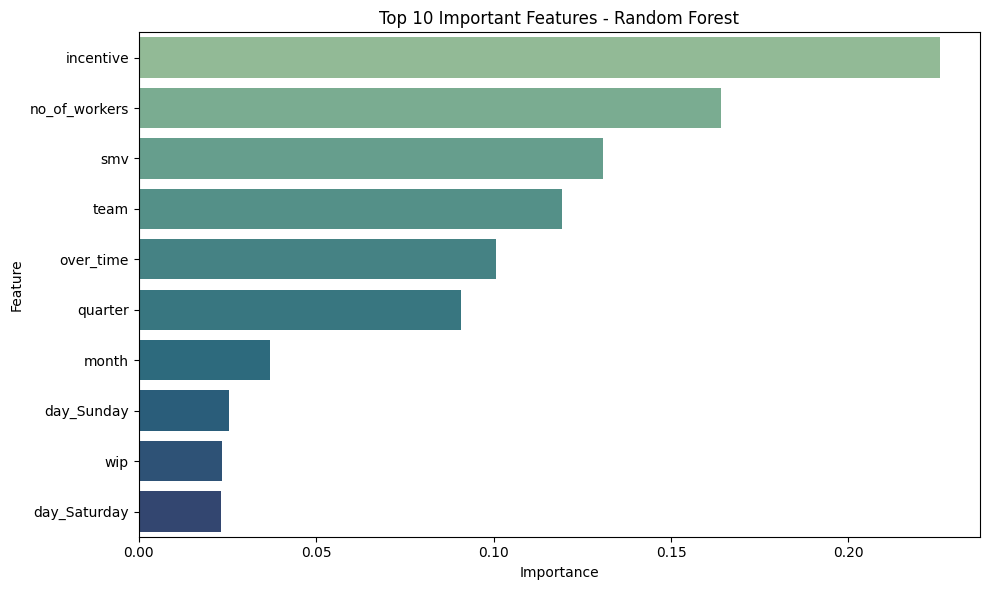

In [161]:
importances = rf.feature_importances_
features = x.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='crest')
plt.title("Top 10 Important Features - Random Forest")
plt.tight_layout()
plt.show()

### XGBoost for Regression

In [162]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [164]:
y_pred_xgb = xgb_model.predict(x_test)

In [165]:
print('XGB R2: ', r2_score(y_test,y_pred_xgb))

XGB R2:  0.32983061645563727


In [166]:
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost RMSE: 0.016738857705620065


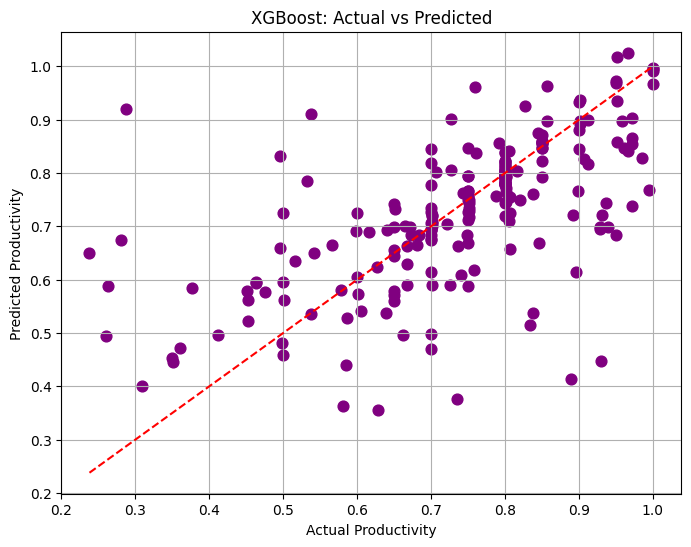

In [167]:
# plot predicted vs actual for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='purple', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.show()

XGBoost may be underfitting or overregularized with its default parameters.

#### Summary 

In [169]:
# create a summary table for model performance
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'XGBoost'],
    'R^2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)],
    'RMSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb)],
    'Status':['Baseline','Underperformed(needs tuning)','Best performance so far','Improved']  
} ,index = ['LR', 'Poly', 'RF', 'XGB'])
display(model_performance)

,Model,R^2 Score,RMSE,Status
LR,Linear Regression,0.307448,0.017298,Baseline
Poly,Polynomial Regression,0.284788,0.017864,Underperformed(needs tuning)
RF,Random Forest,0.383241,0.015405,Best performance so far
XGB,XGBoost,0.329831,0.016739,Improved


Random Forest captures non-linear patterns and interactions better than both linear and XGBoost in this default setup.

C:\Users\Singer\AppData\Local\Temp\ipykernel_12144\3394509605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_performance, x='Model', y='R^2 Score', palette='viridis')
C:\Users\Singer\AppData\Local\Temp\ipykernel_12144\3394509605.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_performance, x='Model', y='RMSE', palette='flare')


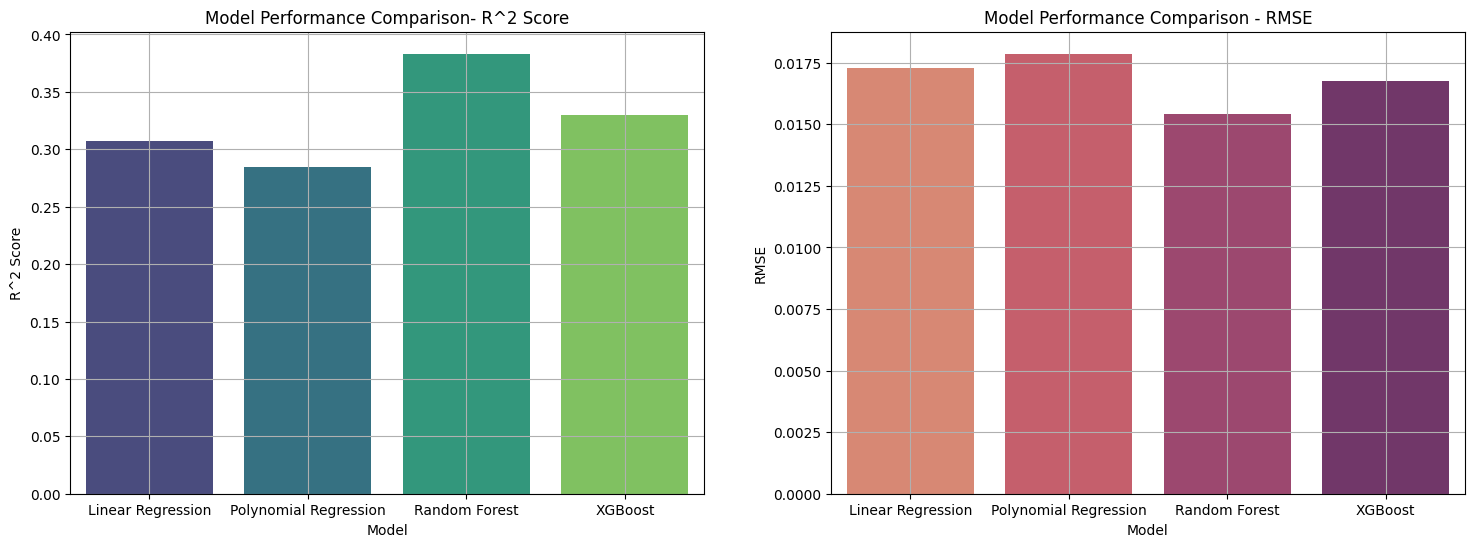

In [185]:
# plot model performance
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.barplot(data=model_performance, x='Model', y='R^2 Score', palette='viridis')
plt.title('Model Performance Comparison- R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.grid()

plt.subplot(1,2,2)
sns.barplot(data=model_performance, x='Model', y='RMSE', palette='flare')
plt.title('Model Performance Comparison - RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid()
plt.show()